In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import plotly.express as px


# Step 1: Define the API endpoint

In [3]:
api_endpoints = [
    "http://127.0.0.1:8000/api/patient/",
    "http://127.0.0.1:8000/api/patient-observation/",
    "http://127.0.0.1:8000/api/cancer-markers/",
    "http://127.0.0.1:8000/api/comorbidity/",  # Assuming this is one of your endpoints
    "http://127.0.0.1:8000/api/patient-histories/" # Assuming this is another one
    # Add any other endpoints you have
]

dataframes = {}

for url in api_endpoints:
    try:
        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        df = pd.json_normalize(data, sep='_')
        endpoint_name = url.split('/')[-2]
        dataframes[endpoint_name] = df
        print(f"Successfully fetched and stored data from: {url} as DataFrame '{endpoint_name}'")
        print(dataframes[endpoint_name].head())
        print("-" * 30)

    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch data from {url}. Error: {e}")
    except ValueError as e:
        print(f"Failed to parse JSON from {url}. Error: {e}")

# Assign DataFrames and reset index
if 'patient' in dataframes:
    patient_df = dataframes['patient'].reset_index(drop=True)
    print("\nPatient DataFrame (no index):")
    print(patient_df.head())

if 'patient-observation' in dataframes:
    obs_df = dataframes['patient-observation'].reset_index(drop=True)
    print("\nPatient Observation DataFrame (no index):")
    print(obs_df.head())

if 'cancer-markers' in dataframes:
    markers_df = dataframes['cancer-markers'].reset_index(drop=True)
    print("\nCancer Markers DataFrame (no index):")
    print(markers_df.head())

if 'comorbidity' in dataframes:
    comorbidity_df = dataframes['comorbidity'].reset_index(drop=True)
    print("\nComorbidity DataFrame (no index):")
    print(comorbidity_df.head())

if 'patient-histories' in dataframes:
    histories_df = dataframes['patient-histories'].reset_index(drop=True)
    print("\nPatient Histories DataFrame (no index):")
    print(histories_df.head())

print("\nAll API data fetched and DataFrames created without default index.")

Successfully fetched and stored data from: http://127.0.0.1:8000/api/patient/ as DataFrame 'patient'
   id        unique_id              name       phone date_of_birth  gender  \
0   1  BSBSC-230000001  EHSANI CHOWDHURY  1711040226    1971-04-18  Female   
1   2  BSBSC-230000002      NISHAT NAHAR  1924241969    1994-01-01  Female   
2   3  BSBSC-240000003  MRS. ARIFA BEGUM  1712777531    1996-12-26  Female   
3   4  BSBSC-240000004      NAZIA NAYEEM  1680549004    1990-11-01  Female   
4   5  BSBSC-240000005      FATEMA BAGUM  1917821797    1962-02-08  Female   

  blood_group      area police_station district socio_economic_status_name  \
0              Shyamoli         Adabor                  Upper middle class   
1                                                                      NaN   
2          B+    Jamgor                   Dhaka                Lower class   
3          A+   Borobag                   Dhaka         Upper middle class   
4                                       

In [4]:
obs_df.head()

,id,disease_progression_status,survival_status,clinical_response_rate_target_lasion,clinical_response_rate_non_target_lasion,clinical_response_rate_new_lasion,clinical_response_rate_result,radiological_response_rate_target_lasion,radiological_response_rate_non_target_lasion,radiological_response_rate_new_lasion,...,radiological_response_rate_result_name,diagnosis_laterility,line_of_treatment,diagnosis_subgroup,pathological_response_rate_target_lasion_name,pathological_response_rate_non_target_lasion_name,pathological_response_rate_new_lasion_name,pathological_response_rate_result_name,diagnosis_disease_group,diagnosis_primary_site
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
patient_df.head()

,id,unique_id,name,phone,date_of_birth,gender,blood_group,area,police_station,district,socio_economic_status_name,socio_economic_status
0,1,BSBSC-230000001,EHSANI CHOWDHURY,1711040226,1971-04-18,Female,,Shyamoli,Adabor,,Upper middle class,NaN
1,2,BSBSC-230000002,NISHAT NAHAR,1924241969,1994-01-01,Female,,,,,NaN,NaN
2,3,BSBSC-240000003,MRS. ARIFA BEGUM,1712777531,1996-12-26,Female,B+,Jamgor,,Dhaka,Lower class,NaN
3,4,BSBSC-240000004,NAZIA NAYEEM,1680549004,1990-11-01,Female,A+,Borobag,,Dhaka,Upper middle class,NaN
4,5,BSBSC-240000005,FATEMA BAGUM,1917821797,1962-02-08,Female,,,,,NaN,NaN


In [6]:
histories_df.shape

(19264, 28)

In [7]:
histories_df.head()

,contraceptive_method,regular_irregular_menstruation,breast_examination_value,family_member,age_of_marriage,age_of_first_child,age_of_menarche,age_of_menopause,breast_examination,excercise_per_week,...,cancer_history,known_mutation,first_diagnosis_date,smoking_history,smoking_packets_per_year,patient_observation_id,marital_status_name,marital_status,contraceptive_method_contraceptive_methods,regular_irregular_menstruation_name
0,NaN,NaN,None,None,NaN,NaN,NaN,None,,None,...,,,None,,None,1,Married,NaN,NaN,NaN
1,NaN,NaN,None,None,NaN,NaN,NaN,None,,None,...,,,None,,None,2,NaN,NaN,NaN,NaN
2,NaN,NaN,None,None,NaN,NaN,NaN,None,Self Examination,None,...,No,No,2020-09-26,No,None,5,Married,NaN,,Regular
3,NaN,NaN,None,None,NaN,NaN,NaN,None,,None,...,,,2022-01-14,,None,6,Married,NaN,NaN,NaN
4,NaN,NaN,None,None,NaN,NaN,NaN,None,Self Examination,None,...,NA,,2022-05-19,No,None,8,Married,NaN,NaN,NaN


In [8]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(histories_df):
    # Drop column: 'contraceptive_method'
    histories_df = histories_df.drop(columns=['contraceptive_method'])
    # Drop column: 'regular_irregular_menstruation'
    histories_df = histories_df.drop(columns=['regular_irregular_menstruation'])
    # Drop column: 'marital_status'
    histories_df = histories_df.drop(columns=['marital_status'])
    return histories_df

histories_df_clean = clean_data(histories_df.copy())
histories_df_clean.head()

,breast_examination_value,family_member,age_of_marriage,age_of_first_child,age_of_menarche,age_of_menopause,breast_examination,excercise_per_week,dietary_habit,height,...,rt_to_chest,cancer_history,known_mutation,first_diagnosis_date,smoking_history,smoking_packets_per_year,patient_observation_id,marital_status_name,contraceptive_method_contraceptive_methods,regular_irregular_menstruation_name
0,None,None,NaN,NaN,NaN,None,,None,,4.11,...,,,,None,,None,1,Married,NaN,NaN
1,None,None,NaN,NaN,NaN,None,,None,,NaN,...,,,,None,,None,2,NaN,NaN,NaN
2,None,None,NaN,NaN,NaN,None,Self Examination,None,,147.00,...,,No,No,2020-09-26,No,None,5,Married,,Regular
3,None,None,NaN,NaN,NaN,None,,None,,5.10,...,,,,2022-01-14,,None,6,Married,NaN,NaN
4,None,None,NaN,NaN,NaN,None,Self Examination,None,,140.00,...,,NA,,2022-05-19,No,None,8,Married,NaN,NaN


In [9]:
markers_df.head()

,name,value,unit,date,patient_observation_id
0,AFP,3.4,,2023-11-27,1
1,CA15.3,19.8,,2023-10-05,1
2,CA15.3,37.1,,2023-11-27,1
3,CA19.9,162.0,,2023-10-05,1
4,CA19.9,53.5,,2023-11-27,1


In [10]:
markers_df.shape

(732, 5)

In [11]:
merged_df_with_markers = pd.merge(obs_df, markers_df, left_on='id', right_on='patient_observation_id', how='left')  # 'left' join to keep all patient observations

In [12]:
merged_df_with_markers.columns


Index(['id', 'disease_progression_status', 'survival_status',
       'clinical_response_rate_target_lasion',
       'clinical_response_rate_non_target_lasion',
       'clinical_response_rate_new_lasion', 'clinical_response_rate_result',
       'radiological_response_rate_target_lasion',
       'radiological_response_rate_non_target_lasion',
       'radiological_response_rate_new_lasion',
       'radiological_response_rate_result',
       'pathological_response_rate_target_lasion',
       'pathological_response_rate_non_target_lasion',
       'pathological_response_rate_new_lasion',
       'pathological_response_rate_result', 'time', 'registration_number',
       'laterality', 'current_chemo_protocol', 'chemo_starting_date',
       'chemo_cycle_no', 'chemo_detail', 'disease_progression_status_date',
       'pfs', 'survival_status_date', 'overall_survival',
       'clinical_response_rate_date', 'radiological_response_rate_date',
       'pathological_response_rate_date', 'cancer_type', 'p

In [13]:
merged_df_with_markers.to_csv('merged_df_with_markers.csv', index=False)

In [14]:
comorbidity_df.head()

,patient_observation_id,name_name
0,675,T2DM
1,683,HTN
2,683,Hypo/Hyper thoiroidism
3,685,HTN
4,686,DM


In [19]:
markers_df.head()


,name,value,unit,date,patient_observation_id
0,AFP,3.4,,2023-11-27,1
1,CA15.3,19.8,,2023-10-05,1
2,CA15.3,37.1,,2023-11-27,1
3,CA19.9,162.0,,2023-10-05,1
4,CA19.9,53.5,,2023-11-27,1


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_patient_marker_timeseries(
    df,
    patient_id=None,
    plot=False,
    save_csv=False,
    output_dir='patient_marker_timeseries',
    marker_col='name',
    value_col='value',
    time_col='date'
):
    """
    Plot and/or save cancer marker values over time per patient.

    Parameters:
    - df (pd.DataFrame): DataFrame with marker data.
    - patient_id (int or str, optional): Patient ID to plot. If None, saves all.
    - plot (bool): Plot cancer marker trends for selected patient.
    - save_csv (bool): Save per-patient marker timeseries CSVs.
    - output_dir (str): Directory to save CSVs.
    - marker_col (str): Column with marker names.
    - value_col (str): Column with marker values.
    - time_col (str): Column with timestamp.
    """

    # Ensure time column is datetime
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

    # Filter out rows with missing key values
    df_filtered = df.dropna(subset=['patient_id_id', marker_col, value_col, time_col])

    # Sort
    df_sorted = df_filtered.sort_values(by=['patient_id_id', marker_col, time_col])
    grouped = df_sorted.groupby('patient_id_id')

    # Save all time series to CSVs
    if save_csv:
        os.makedirs(output_dir, exist_ok=True)
        for pid, group in grouped:
            group.to_csv(f"{output_dir}/patient_{pid}_marker_timeseries.csv", index=False)

    # Plot for a specific patient
    if plot and patient_id is not None:
        if patient_id not in grouped.groups:
            print(f"Patient ID {patient_id} not found.")
            return

        patient_df = grouped.get_group(patient_id)
        plt.figure(figsize=(12, 6))
        for marker, marker_df in patient_df.groupby(marker_col):
            plt.plot(marker_df[time_col], marker_df[value_col], marker='o', label=marker)

        plt.title(f"Cancer Marker Trends Over Time for Patient {patient_id}")
        plt.xlabel("Date")
        plt.ylabel("Marker Value")
        plt.legend(title='Marker Name', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


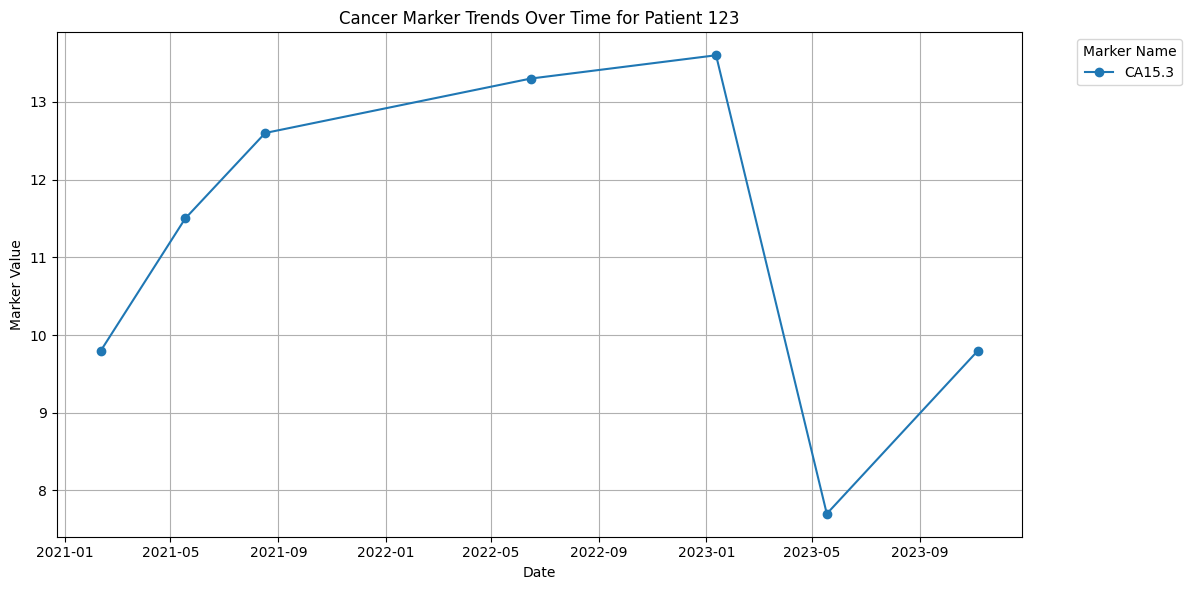

In [17]:
# Just plot cancer markers for one patient
plot_patient_marker_timeseries(merged_df_with_markers, patient_id=123, plot=True)

# Save all patient marker time series as CSVs
# plot_patient_marker_timeseries(merged_df_with_markers, save_csv=True)

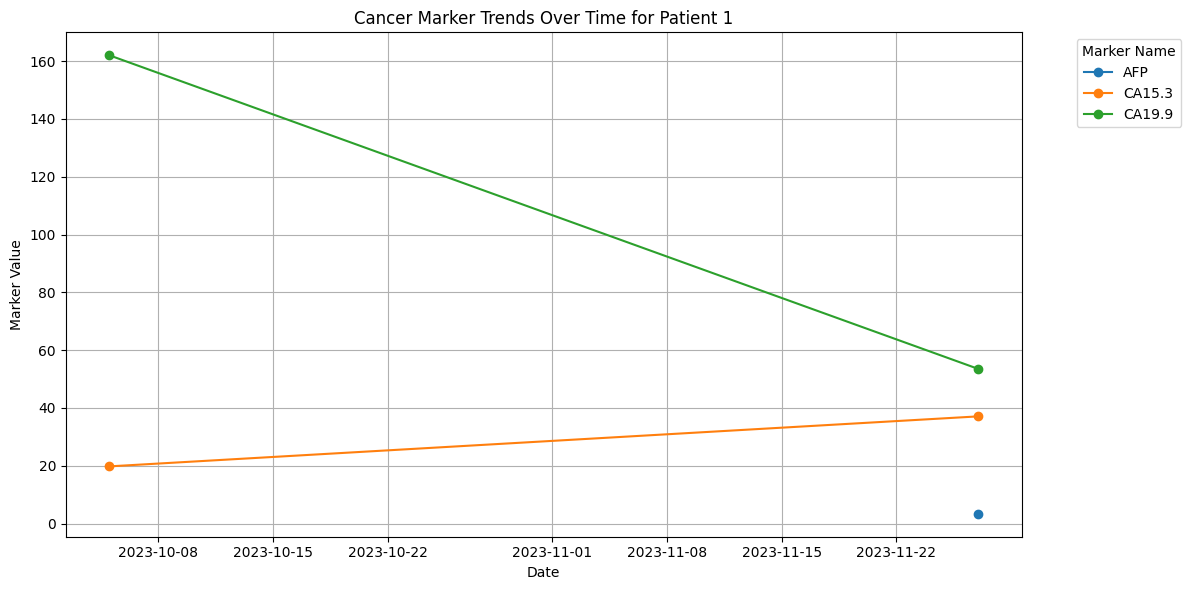

In [18]:
plot_patient_marker_timeseries(merged_df_with_markers, patient_id=1, plot=True, save_csv=True)